<a href="https://colab.research.google.com/github/lahirukavinda/Search-Algos/blob/main/SearchAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **USA Airlines Dataset**
---


### Sources
[Department of Transportation USA](https://www.transtats.bts.gov/Fields.asp?Table_ID=236 ) , [Stat-computing](http://stat-computing.org/dataexpo/2009/the-data.html)

### Import data

In [14]:
import pandas as pd
import numpy as np

import networkx as nx

import matplotlib.pyplot as plt
#from google.colab import drive

#drive.mount('/content/drive')

In [15]:
#url = '/content/drive/MyDrive/MSc/EssentialsForAI/Assignment2/data_100.csv'
url = 'https://raw.githubusercontent.com/lahirukavinda/Search-Algos/main/data_100.csv'

data = pd.read_csv(url)
#data.head()
df = nx.from_pandas_edgelist(data, source='Origin', target='Dest', edge_attr=True)
#print("\tTotal nodes: ", df.number_of_nodes(), "\n","\tTotal edges: ", df.number_of_edges())
print(nx.info(df))
print("Nodes: ", df.nodes())
print("Edges: ", df.edges())

Name: 
Type: Graph
Number of nodes: 26
Number of edges: 37
Average degree:   2.8462
Nodes:  ['IAD', 'TPA', 'IND', 'BWI', 'JAX', 'LAS', 'MCI', 'MCO', 'MDW', 'PHX', 'ISP', 'FLL', 'PBI', 'RSW', 'JAN', 'HOU', 'BHM', 'BNA', 'ORF', 'PHL', 'ABQ', 'ALB', 'AMA', 'AUS', 'BDL', 'BOI']
Edges:  [('IAD', 'TPA'), ('TPA', 'IND'), ('TPA', 'ISP'), ('TPA', 'JAX'), ('IND', 'BWI'), ('IND', 'JAX'), ('IND', 'LAS'), ('IND', 'MCI'), ('IND', 'MCO'), ('IND', 'MDW'), ('IND', 'PHX'), ('BWI', 'ISP'), ('BWI', 'JAN'), ('BWI', 'JAX'), ('JAX', 'BHM'), ('JAX', 'BNA'), ('JAX', 'FLL'), ('JAX', 'HOU'), ('JAX', 'ORF'), ('JAX', 'PHL'), ('LAS', 'ISP'), ('LAS', 'ABQ'), ('LAS', 'ALB'), ('LAS', 'AMA'), ('LAS', 'AUS'), ('LAS', 'BDL'), ('LAS', 'BHM'), ('LAS', 'BNA'), ('LAS', 'BOI'), ('MCO', 'ISP'), ('MCO', 'JAN'), ('MDW', 'ISP'), ('MDW', 'JAN'), ('ISP', 'FLL'), ('ISP', 'PBI'), ('ISP', 'RSW'), ('JAN', 'HOU')]


### Plot graph

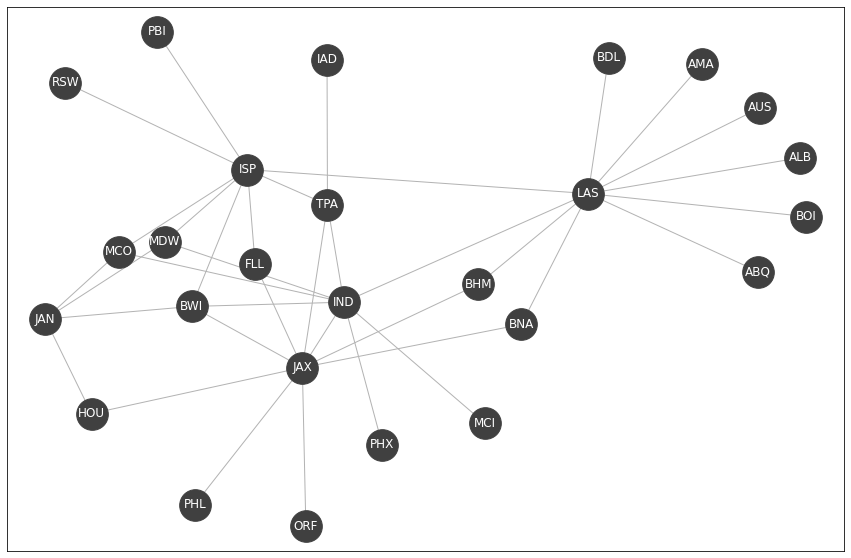

In [16]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(df)
nx.draw_networkx(df, pos, with_labels=True, node_size= 1000, node_color='#404040',edge_color='#B3B3B3', font_color='#FFFFFF') #'#E4E6EB'

###Draw graph highlighting the shortest path

In [17]:
#@title
def draw_path_on_graph(df, path) :
  path_edges = list(zip(path,path[1:]))

  plt.figure(figsize=(15,10))
  pos = nx.spring_layout(df)
  # Draw nodes and edges not included in path
  nx.draw_networkx_nodes(df, pos, nodelist=set(df.nodes)-set(path), node_size= 1000, node_color='#404040')
  nx.draw_networkx_edges(df, pos, edgelist=set(df.edges)-set(path_edges), edge_color='#B3B3B3')

  # Draw nodes and edges included in path
  nx.draw_networkx_nodes(df, pos, nodelist=path, node_size= 1000, node_color='r')
  nx.draw_networkx_edges(df,pos,edgelist=path_edges,edge_color='r')

  # Draw labels
  nx.draw_networkx_labels(df,pos, font_color='#FFFFFF')

# 1 . Uniformed Cost Search (Dijkstra)


---








## 1.1 Distance as weight

['AMA', 'LAS', 'IND', 'MDW', 'JAN', 'HOU']


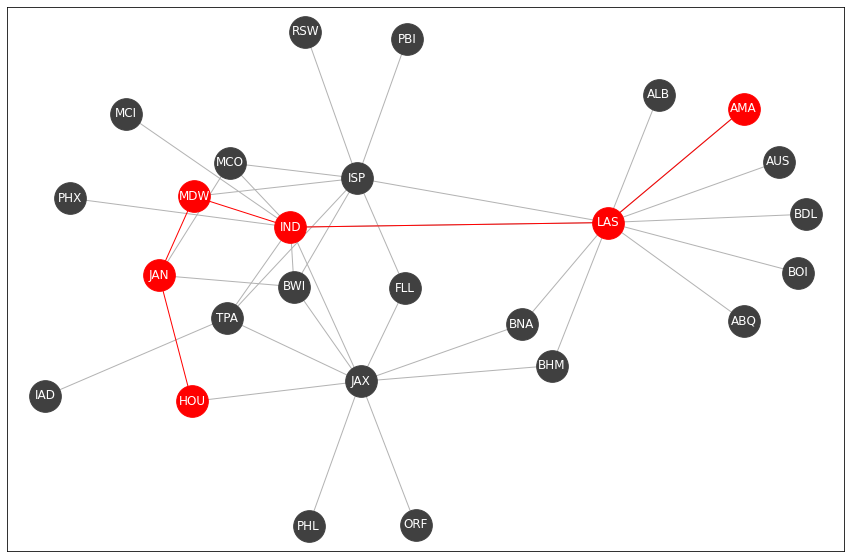

In [18]:
path_distance = nx.dijkstra_path(df, source='AMA', target='HOU', weight='Distance')
print (path_distance)
draw_path_on_graph(df, path_distance)

## 1.2 Air time as weight

['AMA', 'LAS', 'BHM', 'JAX', 'HOU']


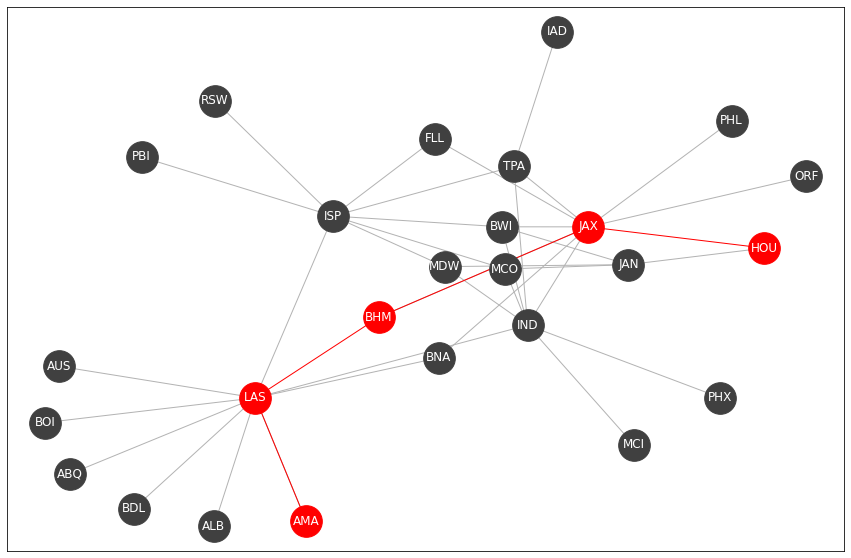

In [19]:
path_airtime = nx.dijkstra_path(df, source='AMA', target='HOU', weight='AirTime')
print (path_airtime)
draw_path_on_graph(df, path_airtime)

Common Algorithm: Shortest Path

In [20]:
# path_shortest = nx.shortest_path(df, source='AMA', target='HOU')
# print (path_shortest)
# draw_path_on_graph(df, path_shortest)

# 2 . Bidirectional Shortest Path

---



['AMA', 'LAS', 'IND', 'JAX', 'HOU']


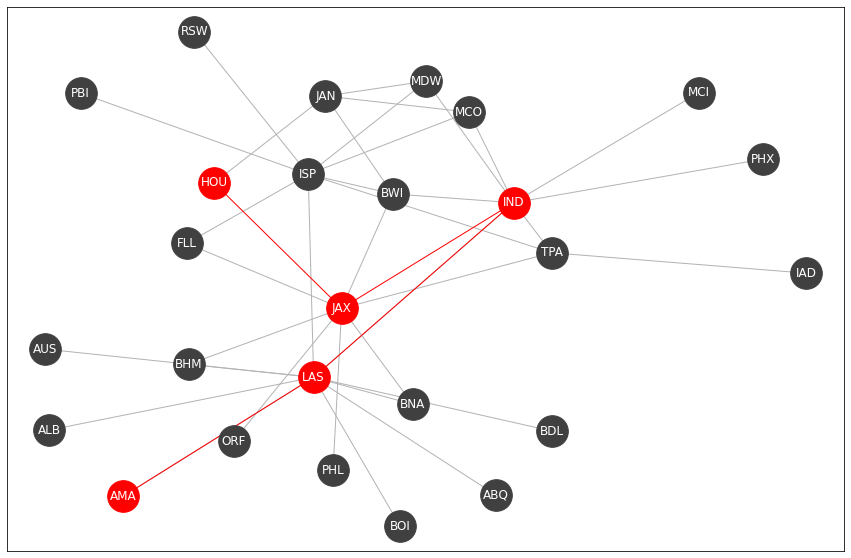

In [21]:
path_bidir = nx.bidirectional_shortest_path(df, source='AMA', target='HOU')
print (path_bidir)
draw_path_on_graph(df, path_bidir)

# 3 . A*

---



In [22]:
#No heuristic function
#path_shortest = nx.astar_path(df, source='AMA', target='HOU', heuristic= None, weight="Distance")
#print (path_shortest)
#draw_path_on_graph(df, path_shortest)

In [23]:
#Import Heuristics
#url_hueristic = '/content/drive/MyDrive/MSc/EssentialsForAI/Assignment2/heuristics_HOU.csv'
url_hueristic = 'https://raw.githubusercontent.com/lahirukavinda/Search-Algos/main/heuristics_HOU.csv'
heuristic_data = pd.read_csv(url_hueristic)
heuristic_df = nx.from_pandas_edgelist(heuristic_data, source='Origin', target='Dest', edge_attr=True)

#print(dict(heuristic_df.edges).get(('IND', 'HOU')).get("Distance"))
#print(heuristic_df.edges())

In [24]:
#Define Heuristic Function
def dist(src, dest):
  a = 0
  if dict(heuristic_df.edges).get((src, dest)) :
    a = dict(heuristic_df.edges).get((src, dest)).get("Distance")
  elif dict(heuristic_df.edges).get((dest, src)) :
    a = dict(heuristic_df.edges).get((dest, src)).get("Distance")

  #print(src, dest, a)
  return a

['AMA', 'LAS', 'IND', 'MDW', 'JAN', 'HOU']


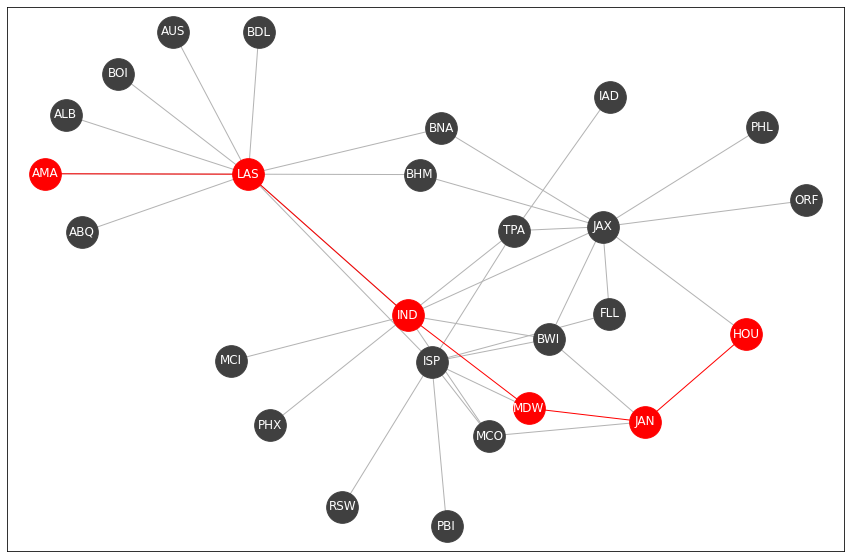

In [25]:
path_astar = nx.astar_path(df, source='AMA', target='HOU', heuristic= dist, weight="Distance")
print (path_astar)
draw_path_on_graph(df, path_astar)

In [26]:
#Heuristic function with air aime as weight
#path_astar_airtime = nx.astar_path(df, source='AMA', target='HOU', heuristic= dist, weight="AirTime")
#print (path_astar_airtime)
#draw_path_on_graph(df, path_astar_airtime)

# Big Data Set

	Number of nodes:  64 	 	Number of edges:  411


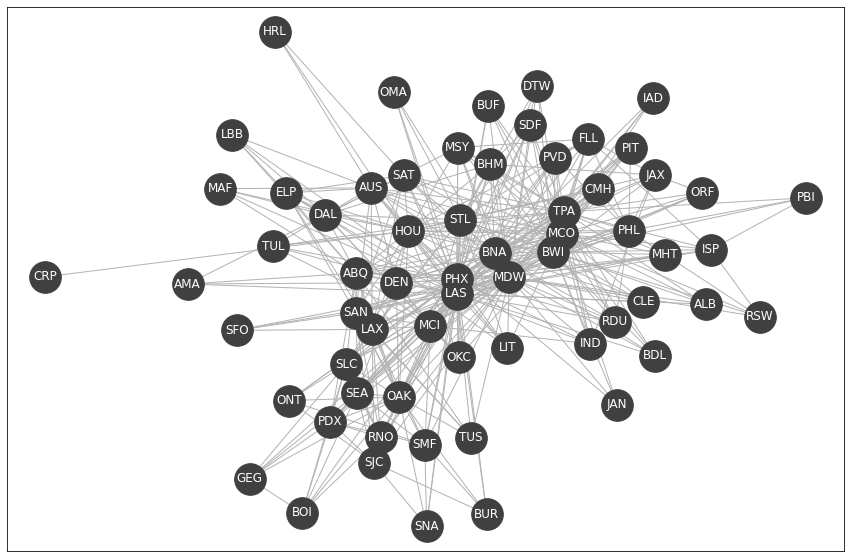

In [27]:
#url_big = '/content/drive/MyDrive/MSc/EssentialsForAI/Assignment2/data_50000.csv'
url_big = 'https://raw.githubusercontent.com/lahirukavinda/Search-Algos/main/data_50000.csv'
data = pd.read_csv(url_big)
df_big = nx.from_pandas_edgelist(data, source='Origin', target='Dest', edge_attr=True)
print("\tNumber of nodes: ", df_big.number_of_nodes(), "\t","\tNumber of edges: ", df_big.number_of_edges())
plt.figure(figsize=(15,10))
pos = nx.spring_layout(df_big)
nx.draw_networkx(df_big, pos, with_labels=True, node_size= 1000, node_color='#404040',edge_color='#B3B3B3', font_color='#FFFFFF') #'#E4E6EB'

### Dijkstra: AMA -> HOU



['AMA', 'DAL', 'HOU']


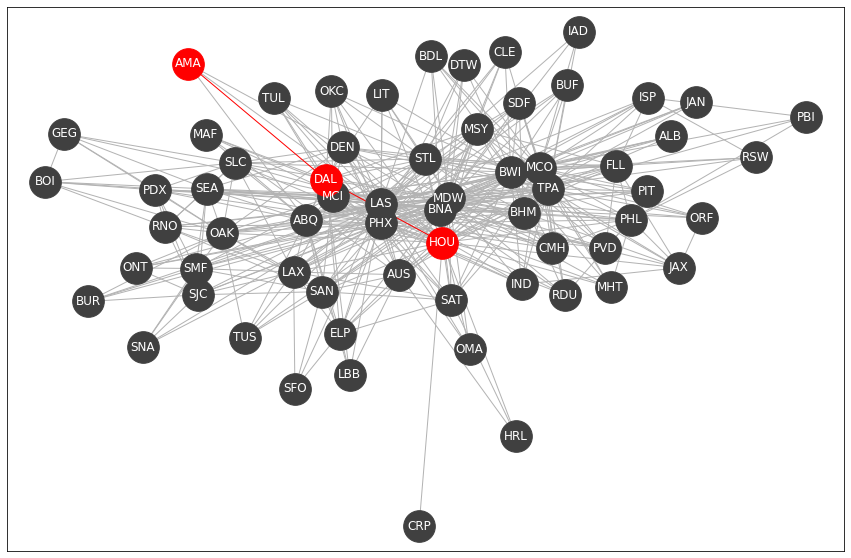

In [28]:
path_distance = nx.dijkstra_path(df_big, source='AMA', target='HOU', weight='Distance')
print (path_distance)
draw_path_on_graph(df_big, path_distance)

### Dijkstra: AMA -> PBI

['AMA', 'DAL', 'MSY', 'TPA', 'PBI']


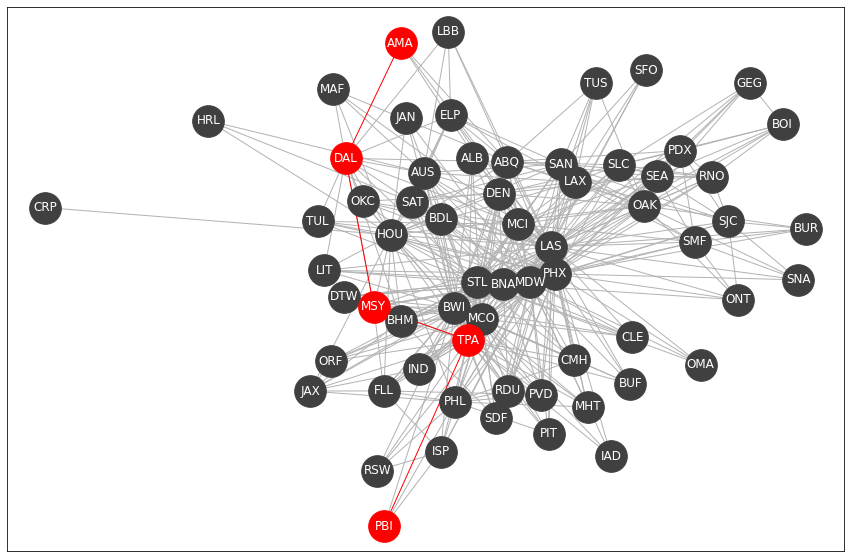

In [29]:
path_distance = nx.dijkstra_path(df_big, source='AMA', target='PBI', weight='Distance')
print (path_distance)
draw_path_on_graph(df_big, path_distance)

In [30]:
# def draw_bfs_tree(df, src) :
#   graph = nx.bfs_tree(df, src)
#   plt.figure(figsize=(15,12))
#   pos_src = nx.spring_layout(graph)
#   nx.draw_networkx(graph, pos_src, with_labels=True, node_size= 1000, node_color='#404040',edge_color='#B3B3B3', font_color='#FFFFFF')

#   nx.draw_networkx(graph.subgraph(src), pos_src,  node_size= 1000, node_color='red', font_color='#FFFFFF')

# draw_bfs_tree(df, 'AMA')

In [31]:
# draw_bfs_tree(df, 'IND')

In [32]:
# from networkx.drawing.nx_agraph import write_dot, graphviz_layout
# !pip install pygraphviz
# pos_sample = graphviz_layout(df_sample, prog='dot')
# nx.draw(graph_sample, pos_sample)